In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Data Preporcessing

In [2]:
data=pd.read_csv('Processed_Flipdata.csv') 

In [3]:
data.head

<bound method NDFrame.head of      Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000  

In [9]:
data.tail

<bound method NDFrame.tail of      Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000  

# Data Exploration & Preprocessing

# Shape of Data

In [11]:
data.shape

(541, 12)

In [ ]:
# In this data set there are 541 rows & 12 columns

In [13]:
data.columns              # these are columns name in this dataset

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [15]:
data.shape[0]             #  count of rows

541

In [16]:
data.shape[1]             # count of columns

12

# Summery of data

In [19]:
data.describe().round(2)

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.00,541.00,541.00,541.00,541.00,541.00
mean,289.71,110.55,5.40,4871.59,0.06,16.43
std,182.36,60.60,1.98,780.15,0.24,2.52
min,0.00,16.00,2.00,800.00,0.00,4.50
25%,135.00,64.00,4.00,5000.00,0.00,16.51
50%,273.00,128.00,6.00,5000.00,0.00,16.71
75%,434.00,128.00,8.00,5000.00,0.00,16.94
max,642.00,256.00,8.00,7000.00,1.00,41.94


In [ ]:
# count---number of null values
#mean--- average value  
#std--variability
#min---minimum value
#25% ....first quartile
#50%----second quartile---median
#75% ---third quartile---
#max--- maximum value
#mean = sum of all values/number of values

In [4]:
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [5]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [ ]:
# in this function detect missing values in the given series object. 

In [6]:
df.nunique()

Unnamed: 0       541
Model            187
Colour           275
Memory             5
RAM                5
Battery_          37
Rear Camera       14
Front Camera      13
AI Lens            2
Mobile Height     38
Processor_       123
Prize            158
dtype: int64

In [ ]:
# it finds the total number of unique observations over the index axis. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [ ]:
#.Analyze type of data like int ,float or objec

# Data Preprocessing

In [ ]:
Now, we categorize the features depending on their datatype (int, float, object) and
then calculate the number of them. 



In [6]:
obj=(df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variable:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variable:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variable",len(fl_cols))



Categorical variable: 6
Integer variable: 0
Float variable 1


In [7]:
# Here, categorical variable are 6, no integer values & float variable is 1.

In [ ]:
 Here some of the data types are floating & Categorical point values. 
We need to change the into integer values except Rating feature.

In [12]:
df['Prize'].unique()

array(['7,299', '11,999', '5,649', '8,999', '7,999', '9,499', '10,699',
       '6,999', '15,999', '13,999', '12,999', '6,199', '6,599', '7,749',
       '9,699', '9,999', '10,999', '20,999', '15,499', '18,999', '12,499',
       '10,499', '14,490', '16,999', '6,499', '5,999', '6,299', '16,499',
       '14,499', '13,490', '19,999', '1,449', '1,849', '1,422', '29,999',
       '1,299', '17,999', '11,499', '2,615', '28,999', '23,999', '14,999',
       '2,490', '7,961', '2,499', '11,248', '6,799', '13,499', '8,749',
       '8,049', '1,375', '1,599', '7,499', '7,245', '26,999', '21,999',
       '17,499', '21,499', '7,115', '49,999', '32,999', '8,499', '25,999',
       '4,999', '3,549', '1,699', '920', '11,970', '1,199', '12,990',
       '6,978', '7,370', '44,999', '8,995', '24,999', '11,249', '34,999',
       '21,174', '43,999', '7,993', '8,069', '30,499', '30,999', '9,290',
       '8,449', '8,495', '29,499', '20,998', '19,280', '8,649', '19,499',
       '9,349', '8,288', '12,272', '6,794', '2

# Convert Prize object dtype into integer dtype

In [8]:
df['Prize'] = df['Prize'].str.replace(',', '').astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


# One Hot Encoder

In [ ]:
One hot Encoding is the best way to convert categorical data into binary vectors. 
This maps the values to integer values. By using OneHotEncoder,
we can easily convert object data into int. 

In [10]:
from sklearn.preprocessing import OneHotEncoder

s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical Variable:")
print(object_cols)
print("No.of. categorical features:",
     len (object_cols))

Categorical Variable:
['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']
No.of. categorical features: 5


# Feature Engineering

In [11]:
df['Model'].unique

<bound method Series.unique of 0            Infinix SMART 7
1            Infinix SMART 7
2               MOTOROLA G32
3                   POCO C50
4            Infinix HOT 30i
               ...          
536    SAMSUNG Galaxy S23 5G
537                 LAVA Z21
538           Tecno Spark 8T
539    SAMSUNG Galaxy A54 5G
540                 OPPO A77
Name: Model, Length: 541, dtype: object>

In [13]:
df['Colour'].unique

<bound method Series.unique of 0         Night Black
1          Azure Blue
2        Mineral Gray
3          Royal Blue
4            Marigold
            ...      
536             Cream
537              Cyan
538    Turquoise Cyan
539      Awesome Lime
540          Sky Blue
Name: Colour, Length: 541, dtype: object>

In [12]:
df['Processor_'].unique

<bound method Series.unique of 0       Unisoc Spreadtrum SC9863A1
1       Unisoc Spreadtrum SC9863A1
2          Qualcomm Snapdragon 680
3               Mediatek Helio A22
4                              G37
                  ...             
536    Qualcomm Snapdragon 8 Gen 2
537                      Octa Core
538             MediaTek Helio G35
539        Exynos 1380, Octa Core 
540             Mediatek Helio G35
Name: Processor_, Length: 541, dtype: object>

# Ordinal Encoding 

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
Columns_to_encoder =['Model','Colour','Processor_']

In [9]:
encoder = OrdinalEncoder() 


In [10]:
df[Columns_to_encoder] =encoder.fit_transform(df[Columns_to_encoder])

In [14]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299
2,2,37.0,149.0,128,8,5000,50MP,16MP,0,16.64,75.0,11999
3,3,69.0,201.0,32,2,5000,8MP,5MP,0,16.56,56.0,5649
4,4,12.0,130.0,128,8,5000,50MP,5MP,1,16.76,14.0,8999


# converting Rear camera object into integer

In [11]:
df['Rear Camera mp'] = df['Rear Camera'].apply(lambda x: int(x[:-2]) if isinstance(x, str) else x)


In [16]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear Camera mp
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13
2,2,37.0,149.0,128,8,5000,50MP,16MP,0,16.64,75.0,11999,50
3,3,69.0,201.0,32,2,5000,8MP,5MP,0,16.56,56.0,5649,8
4,4,12.0,130.0,128,8,5000,50MP,5MP,1,16.76,14.0,8999,50


In [12]:
df['Front Camera mp'] = df['Front Camera'].apply(lambda x: int(x[:-2])if isinstance(x, str) else x)


In [18]:
df.head(2)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear Camera mp,Front Camera mp
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       541 non-null    int64  
 1   Model            541 non-null    float64
 2   Colour           541 non-null    float64
 3   Memory           541 non-null    int64  
 4   RAM              541 non-null    int64  
 5   Battery_         541 non-null    int64  
 6   Rear Camera      541 non-null    object 
 7   Front Camera     541 non-null    object 
 8   AI Lens          541 non-null    int64  
 9   Mobile Height    541 non-null    float64
 10  Processor_       541 non-null    float64
 11  Prize            541 non-null    int64  
 12  Rear Camera mp   541 non-null    int64  
 13  Front Camera mp  541 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 59.3+ KB


In [20]:
df.isnull().sum()

Unnamed: 0         0
Model              0
Colour             0
Memory             0
RAM                0
Battery_           0
Rear Camera        0
Front Camera       0
AI Lens            0
Mobile Height      0
Processor_         0
Prize              0
Rear Camera mp     0
Front Camera mp    0
dtype: int64

# Exploratory Data Analysis(EDA)

In [ ]:
EDA refers to the deep analysis of data so as to 
discover different patterns and spot anomalies. 

C:\Users\Sonali\AppData\Local\Temp\ipykernel_38876\2444695637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

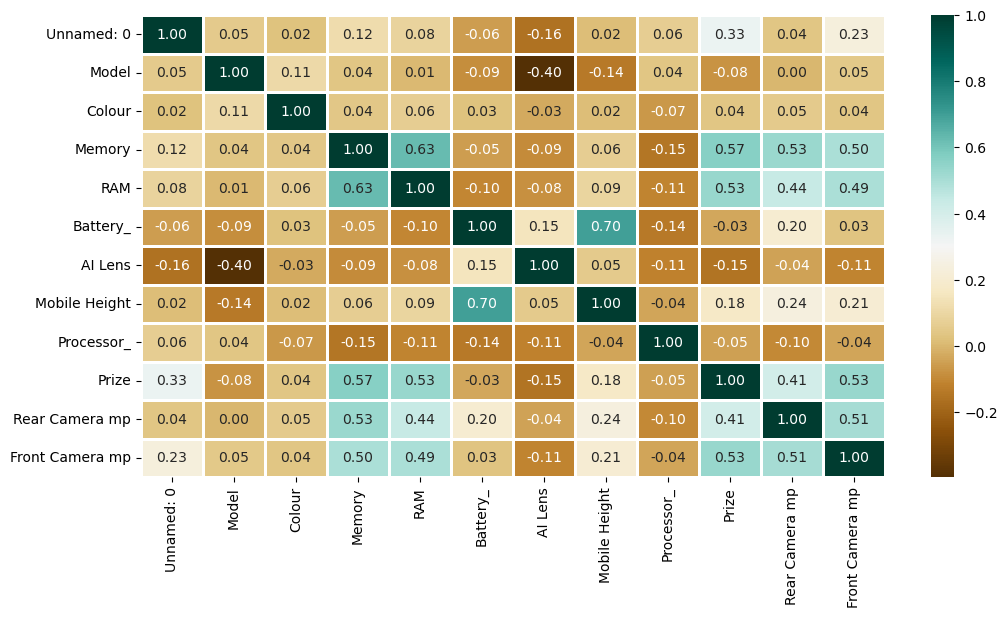

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),
           cmap = 'BrBG',
           fmt = '.2f',
           linewidths =2,
           annot = True)

# Barplot

In [ ]:
To analyze the different categorical features. Let’s draw the barplot.

<Axes: title={'center': 'No. Unique Values of Categorical Features'}>

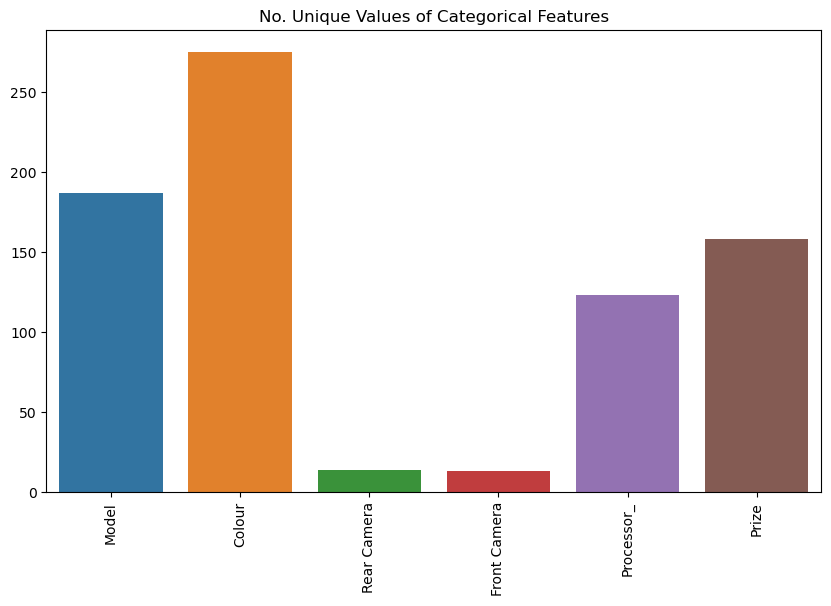

In [26]:
unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title("No. Unique Values of Categorical Features")
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [ ]:
# The plot shows that Colour has above 250 unique categories ,
# Model blow200 unique categories  and 
# prize or Processor has around 150 to 200 unique categories 
# other features have around below 50 unique categories. 
# To findout the actual count of each category we can plot the bargraph of each four features separately.



C:\Users\Sonali\AppData\Local\Temp\ipykernel_38876\2973226960.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


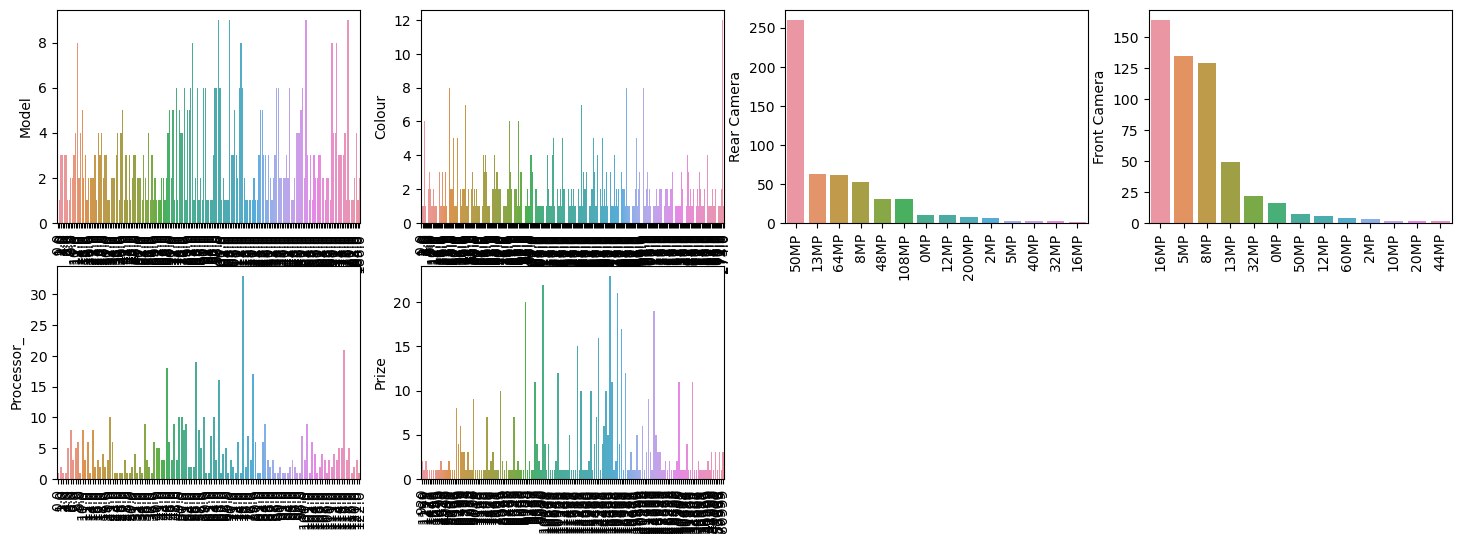

In [27]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

# Feature Extraction

# Data Visualization and Analysis

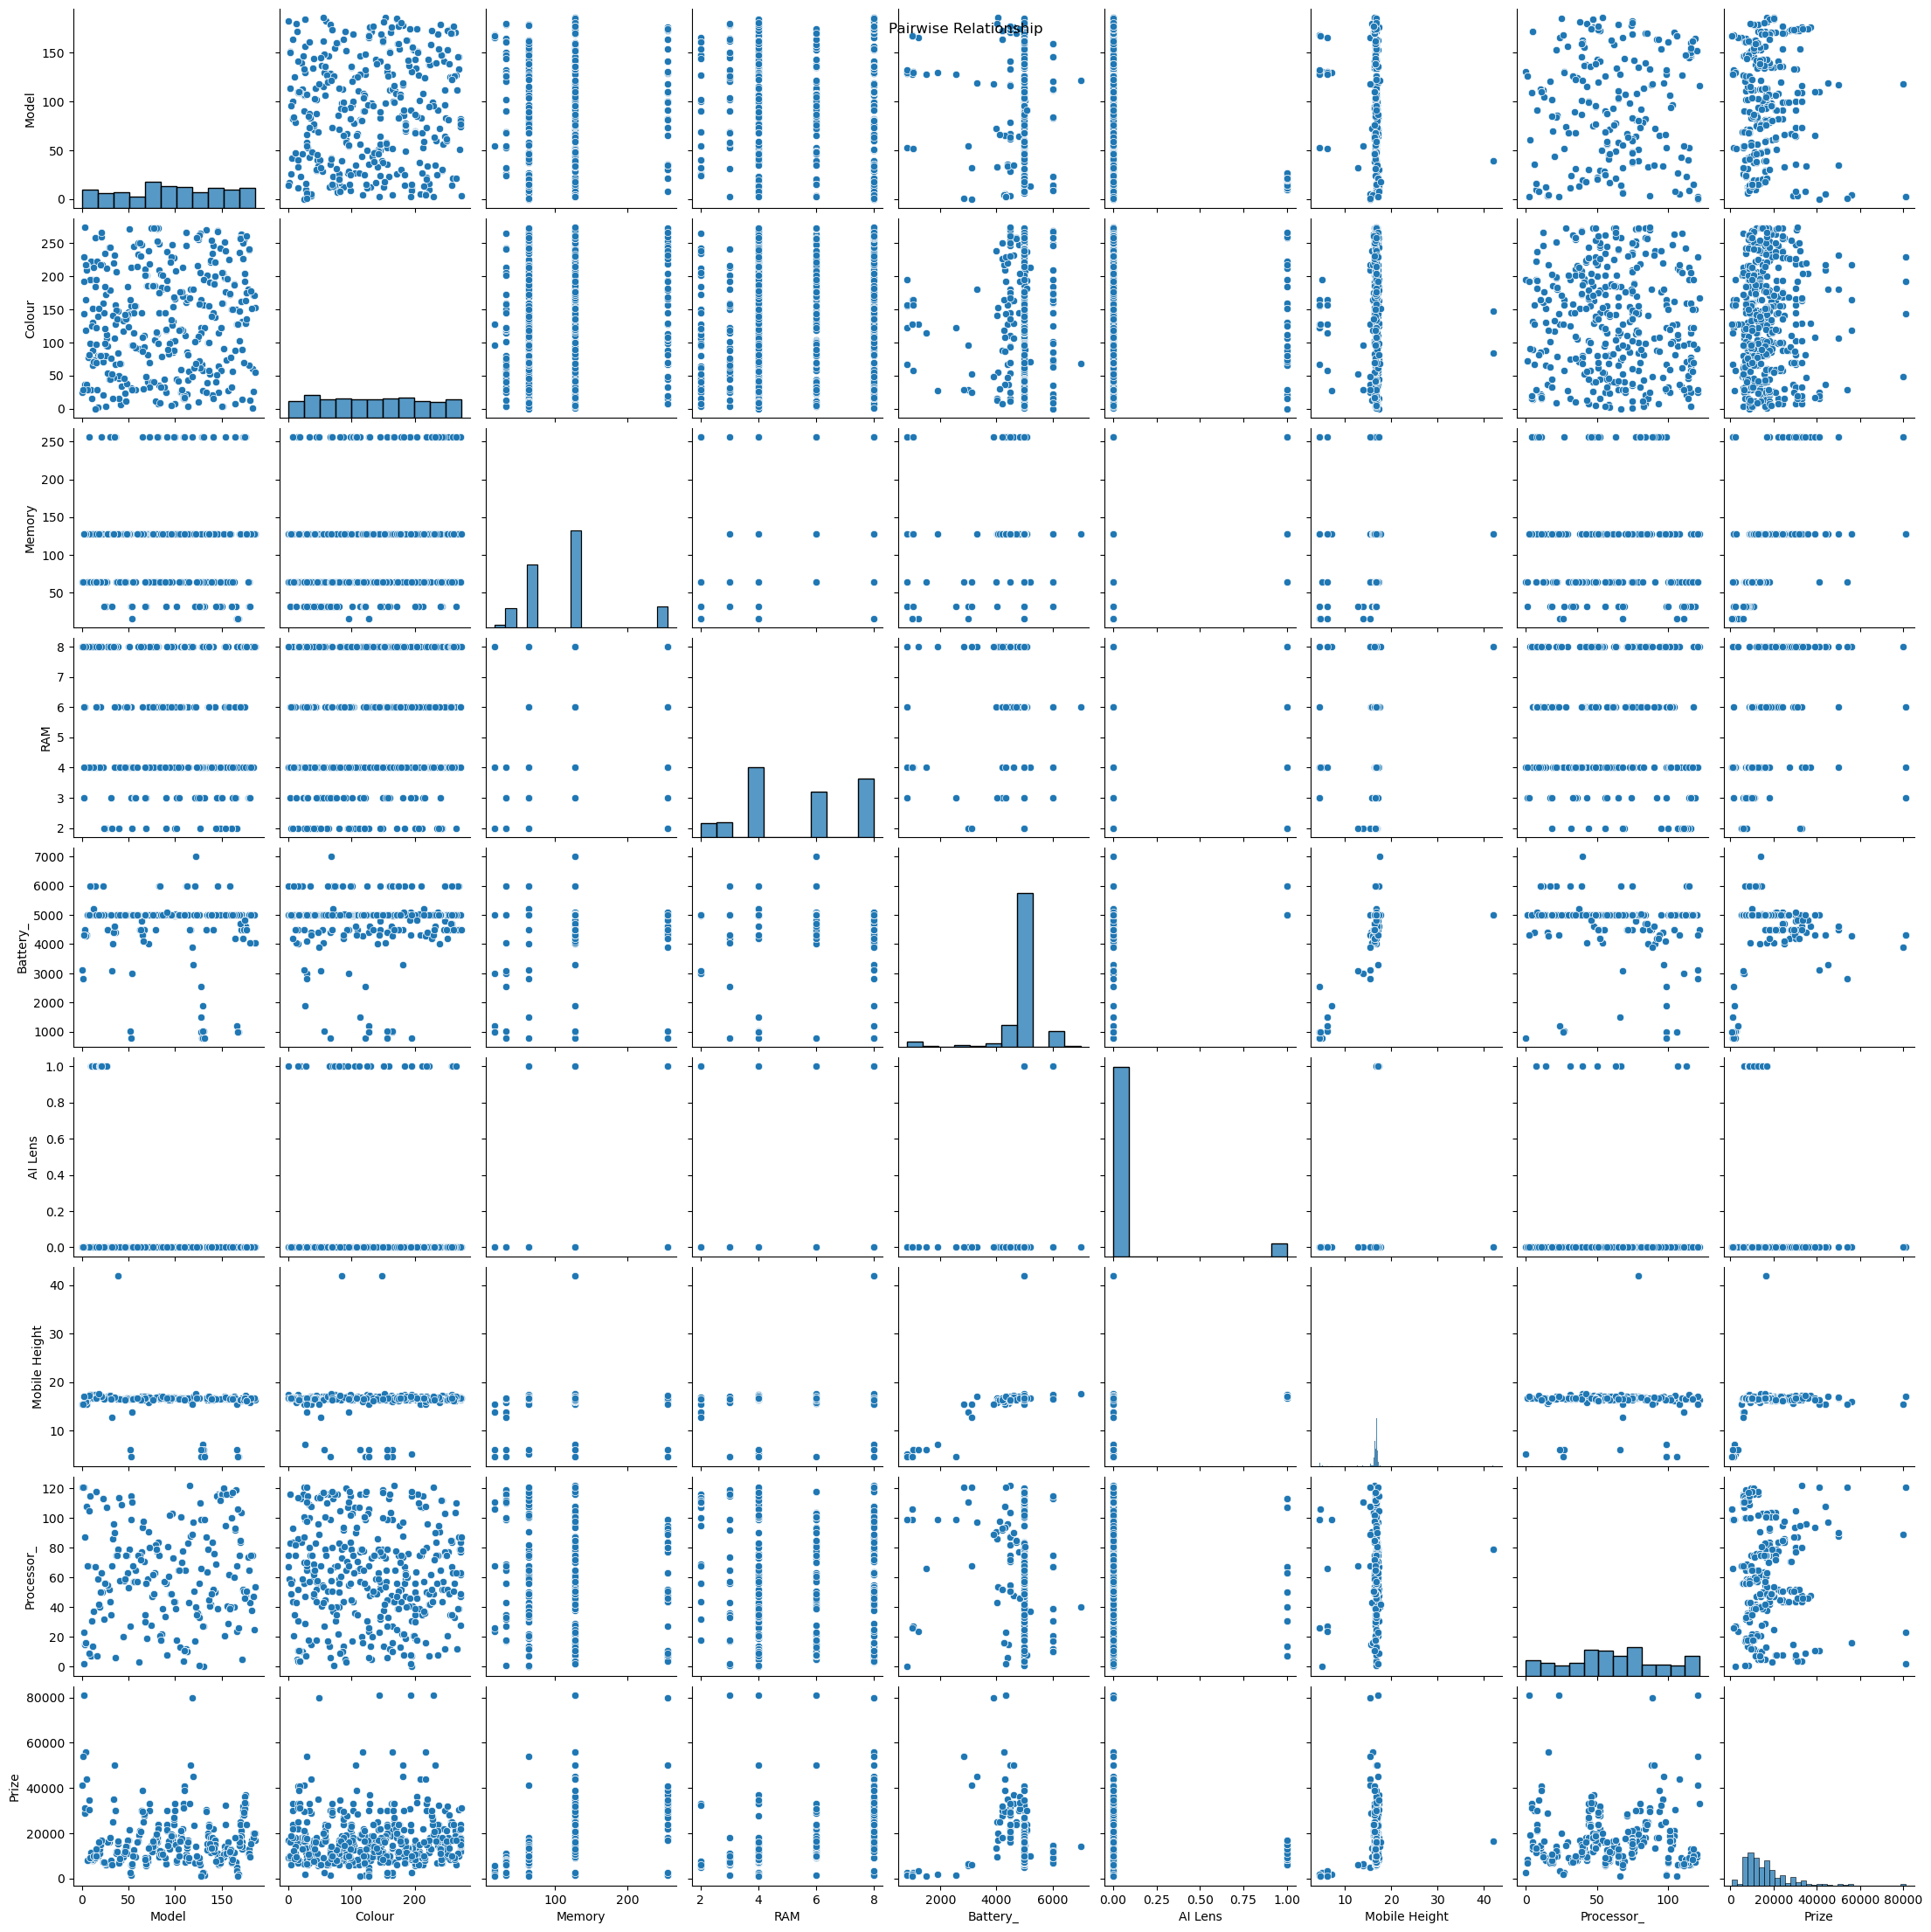

In [29]:
pair_plt = ['Model','Colour','Memory','RAM','Battery_','Rear Camera','Front Camera','AI Lens','Mobile Height','Processor_','Prize']
sns.pairplot(df[pair_plt])
plt.suptitle('Pairwise Relationship') 
plt.show()


# Most affecting Features on price

In [14]:
correlation_with_prize = df.corr()['Prize'].sort_values(ascending=False)


C:\Users\Sonali\AppData\Local\Temp\ipykernel_46400\3620714420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_prize = df.corr()['Prize'].sort_values(ascending=False)


In [15]:
correlation_with_prize

Prize              1.000000
Memory             0.566660
Front Camera mp    0.532321
RAM                0.532024
Rear Camera mp     0.410367
Unnamed: 0         0.333940
Mobile Height      0.176009
Colour             0.038895
Battery_          -0.034297
Processor_        -0.050244
Model             -0.075163
AI Lens           -0.153691
Name: Prize, dtype: float64

# Jointplot

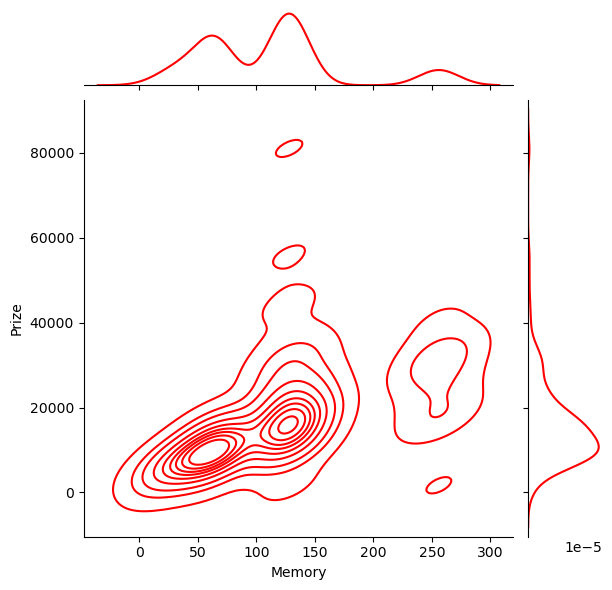

In [34]:
sns.jointplot(x='Memory',y='Prize',data=df,color='red',kind='kde')

# Internal Memory VS Price

<Axes: xlabel='Prize', ylabel='Memory'>

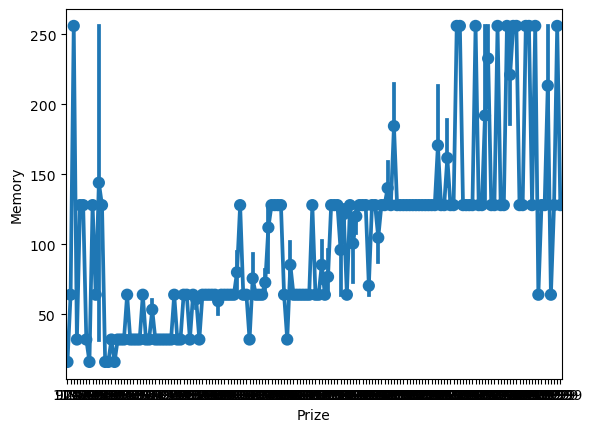

In [35]:
sns.pointplot(x='Prize',y='Memory', data=df)

# Battery Power vs Prize

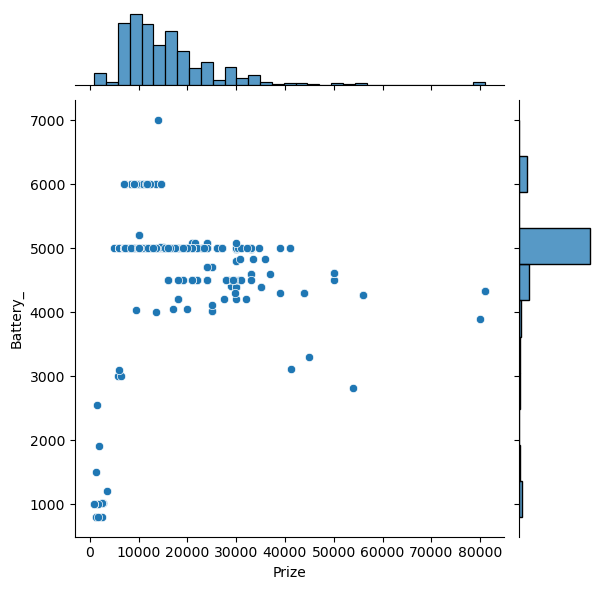

In [36]:
sns.jointplot(x='Prize',y='Battery_', data=df)

# No of Phones vs Camera megapixels of front and Rear camera¶


Text(0.5, 0, 'MegaPixels')

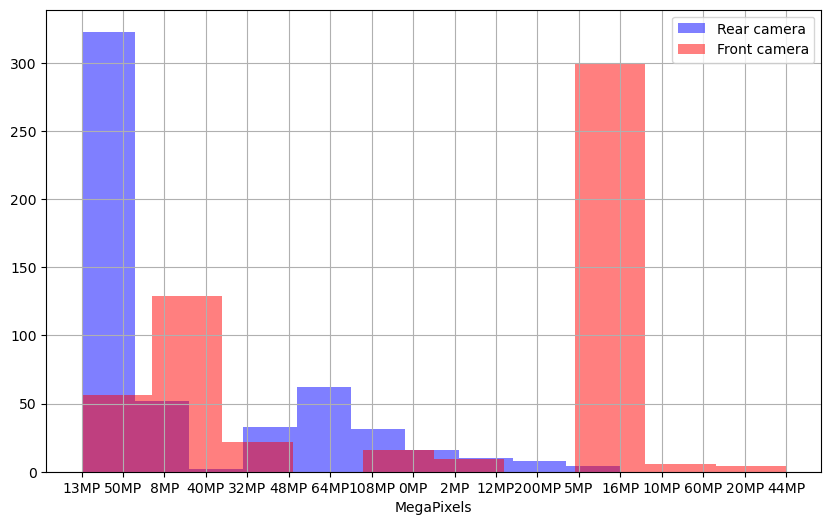

In [37]:
plt.figure(figsize=(10,6))
df['Rear Camera'].hist(alpha=0.5,color='blue',label='Rear camera')
df['Front Camera'].hist(alpha=0.5,color='red',label='Front camera')
plt.legend()
plt.xlabel('MegaPixels')


# Mobile Height vs Price


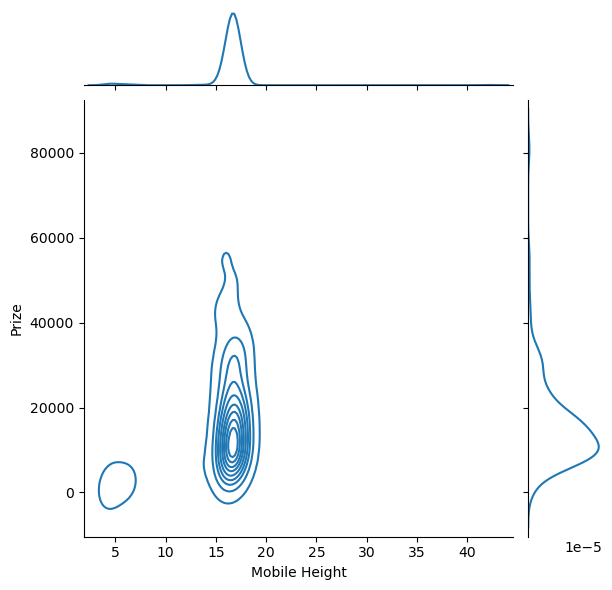

In [38]:
sns.jointplot(x='Mobile Height',y='Prize',data=df,kind='kde')


<Axes: xlabel='Memory', ylabel='Prize'>

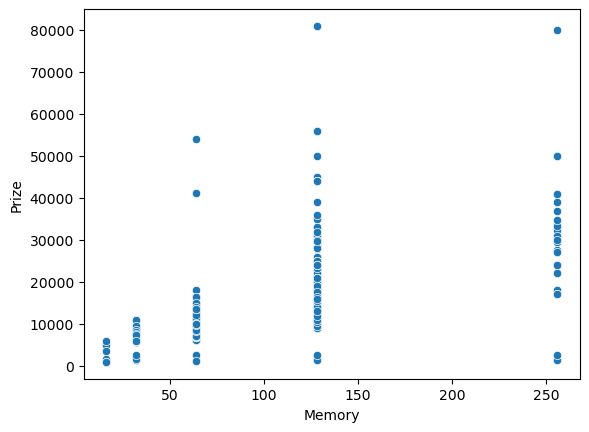

In [39]:
sns.scatterplot(x= "Memory",y= "Prize",data=df)

<Axes: xlabel='Front Camera', ylabel='Prize'>

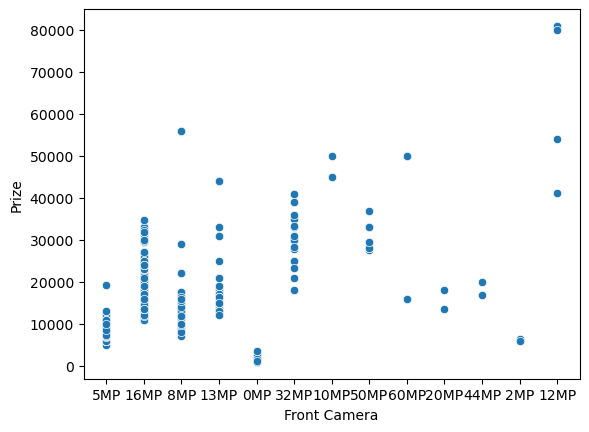

In [46]:
sns.scatterplot(x='Front Camera', y='Prize',data=df)

# outliers

In [16]:
df[(df['Memory'] <250) & (df['Prize'] > 50000)]

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear Camera mp,Front Camera mp
416,452,4.0,217.0,128,8,4270,50MP,8MP,0,16.00,16.0,55999,50,8
417,453,4.0,165.0,128,8,4270,50MP,8MP,0,16.00,16.0,55999,50,8
426,472,4.0,118.0,128,8,4270,50MP,8MP,0,16.00,16.0,55999,50,8
493,576,2.0,144.0,128,6,4323,12MP,12MP,0,17.02,23.0,80999,12,12
520,614,2.0,193.0,128,3,4323,12MP,12MP,0,17.02,2.0,80999,12,12
525,621,2.0,230.0,128,4,4323,12MP,12MP,0,17.02,121.0,80999,12,12
532,631,1.0,29.0,64,8,2815,12MP,12MP,0,15.49,121.0,53999,12,12


# outliers by Quantile Method

In [17]:
Q1 = df['Prize'].quantile(0.25)
Q3 = df['Prize'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Prize'] < (Q1 - 1.5 * IQR)) | (df['Prize'] > (Q3 + 1.5 * IQR))]


In [18]:
outliers

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear Camera mp,Front Camera mp
222,222,117.0,181.0,128,8,4500,50MP,10MP,0,16.76,88.0,49999,50,10
286,289,119.0,181.0,128,8,3300,12MP,10MP,0,17.02,97.0,44999,12,10
305,309,34.0,47.0,128,8,4400,50MP,32MP,0,16.64,96.0,34999,50,32
308,312,5.0,209.0,128,8,4300,64MP,13MP,0,15.49,108.0,43999,64,13
309,313,5.0,37.0,128,8,4300,64MP,13MP,0,15.49,108.0,43999,64,13
327,332,5.0,217.0,128,8,4300,64MP,13MP,0,15.49,108.0,43999,64,13
396,421,176.0,129.0,256,4,4600,50MP,50MP,0,17.22,48.0,36999,50,50
400,427,35.0,107.0,256,4,4610,200MP,60MP,0,16.94,90.0,49999,200,60
416,452,4.0,217.0,128,8,4270,50MP,8MP,0,16.00,16.0,55999,50,8
417,453,4.0,165.0,128,8,4270,50MP,8MP,0,16.00,16.0,55999,50,8


# Remove Outliers

In [19]:
df.drop(outliers.index)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear Camera mp,Front Camera mp
0,0,23.0,159.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5
1,1,23.0,20.0,64,4,6000,13MP,5MP,1,16.76,113.0,7299,13,5
2,2,37.0,149.0,128,8,5000,50MP,16MP,0,16.64,75.0,11999,50,16
3,3,69.0,201.0,32,2,5000,8MP,5MP,0,16.56,56.0,5649,8,5
4,4,12.0,130.0,128,8,5000,50MP,5MP,1,16.76,14.0,8999,50,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,633,55.0,96.0,64,4,5000,50MP,8MP,0,16.55,68.0,9790,50,8
535,636,104.0,119.0,64,3,5000,13MP,5MP,0,16.51,65.0,9999,13,5
537,638,32.0,52.0,32,2,3100,5MP,2MP,0,12.70,68.0,5998,5,2
538,639,123.0,259.0,64,4,5000,50MP,8MP,0,16.76,35.0,9990,50,8


# Drop Unnecessary Columns

In [20]:
df.drop(['Unnamed: 0', 'Rear Camera', 'Front Camera'], axis=1, inplace=True)


In [21]:
df.head(2)

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Prize,Rear Camera mp,Front Camera mp
0,23.0,159.0,64,4,6000,1,16.76,113.0,7299,13,5
1,23.0,20.0,64,4,6000,1,16.76,113.0,7299,13,5


In [23]:
df.to_csv('data_for_tablue1.xls')

# Dimensionality Reduction

# Feature Selection using Filter Method

# Visualisation

# Correlation Analysis

In [ ]:
plt.Figure(figsize =(12,5) dpl =200)
sns.heatmap(df.corr(numeric_only= True)(["Memory",'Front Camera MP','Rear Camer MP','RAM']annot = True ,CMP= Matrix))
           plt.title('Correlation of features with Prize')
    plt.show()

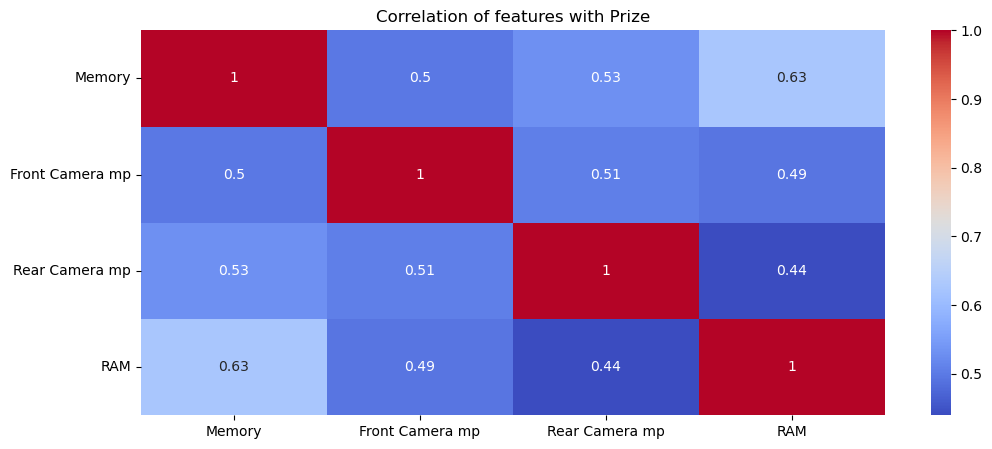

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
dpl = 200

# Assuming you want to select specific columns for correlation analysis
selected_cols = ['Memory', 'Front Camera mp', 'Rear Camera mp', 'RAM']
correlation_matrix = df[selected_cols].corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of features with Prize')
plt.show()


# Countplot of RAM

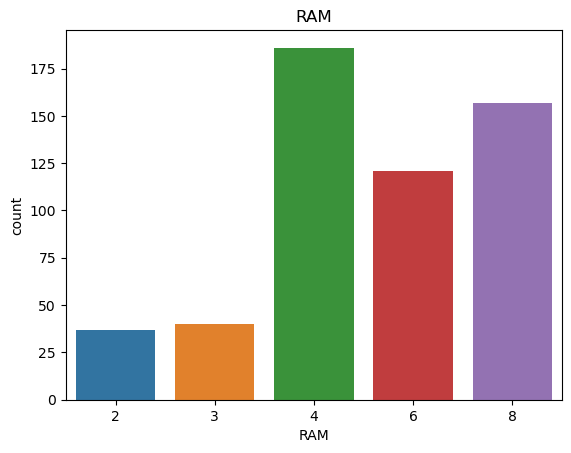

In [56]:
sns.countplot(data=df,x='RAM')
plt.title('RAM')
plt.show()

# Boxplot of Memory

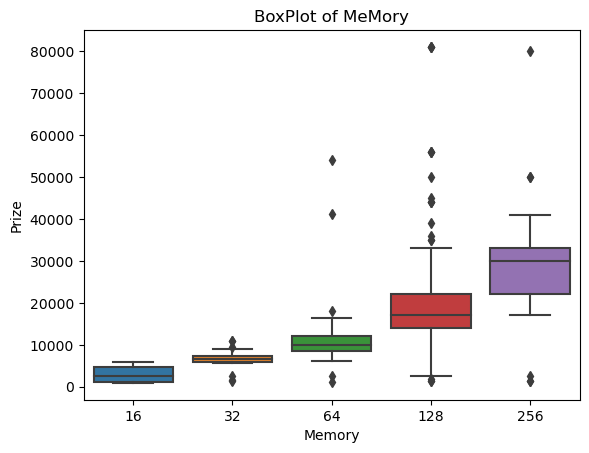

In [57]:
sns.boxplot(data=df, x= 'Memory', y ='Prize')
plt.title('BoxPlot of MeMory')
plt.show()

# Jointplot of Front Camera

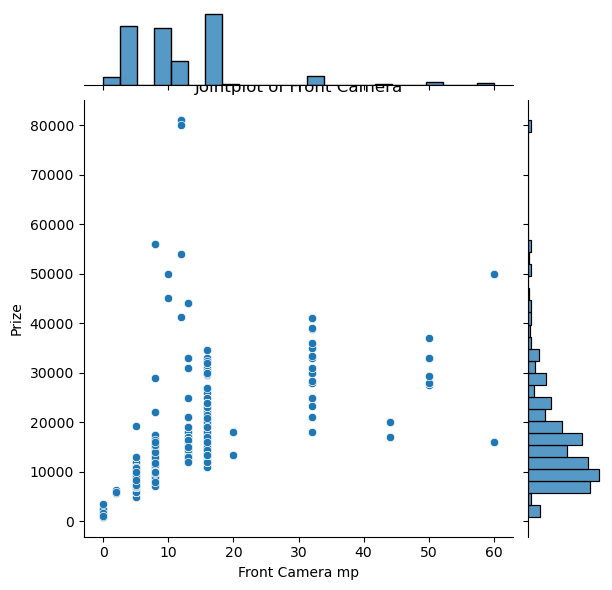

In [58]:
sns.jointplot(data=df, x='Front Camera mp', y = 'Prize')
plt.title('Jointplot of Front Camera')
plt.show()

# X & Y array

In [30]:
x=df.drop('Prize', axis =1)

In [31]:
y=df['Prize']

# Spliting the Data

In [33]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_sized.33,random_state)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 101)


# Creating & Training Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()


In [38]:
lm.fit(x_train,y_train)

LinearRegression()

In [39]:
lm.score(x_test,y_test)

0.45878619646215246

# Creating & Training Logistic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()


In [42]:
logmodel.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
logmodel.score(x_test,y_test)

0.07262569832402235

# Creating & Training Decision Tree Model

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()


In [47]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
dtree.score(x_test,y_test)

0.49162011173184356

# Tree Visulization

In [59]:
feature_names = ['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize', 'Rear Camera mp', 'Front Camera mp']


In [70]:
from sklearn.tree import plot_tree

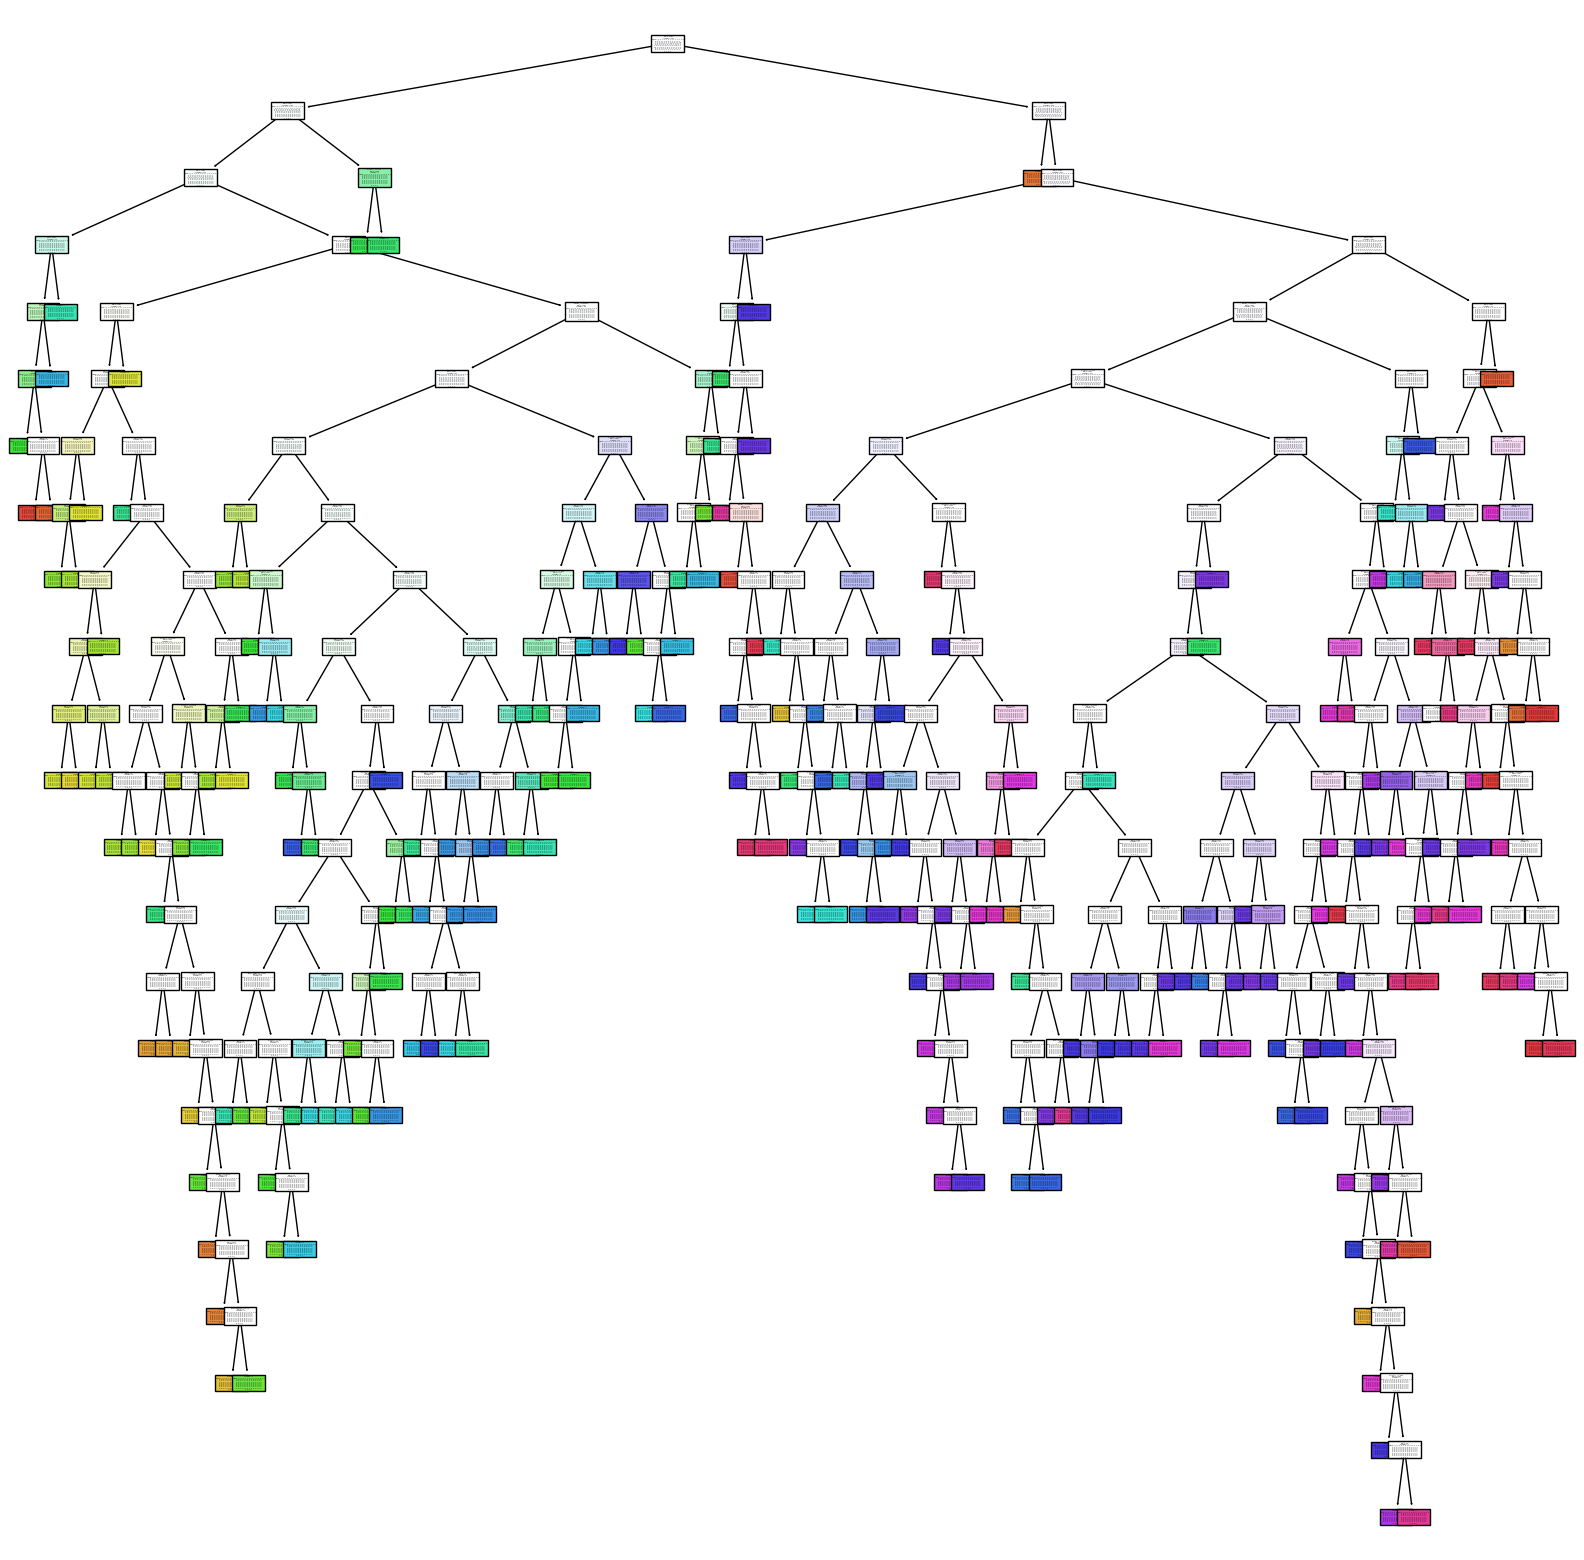

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Assuming x_train and y_train are your training data
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Visualizing the decision tree
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=x.columns, filled=True)
plt.show()


# Creating & Training Random Tree Model

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [74]:
rfc.score(x_test,y_test)

0.5083798882681564

# Result : Linear regression

In [66]:
y_pred = lm.predict(x_test)


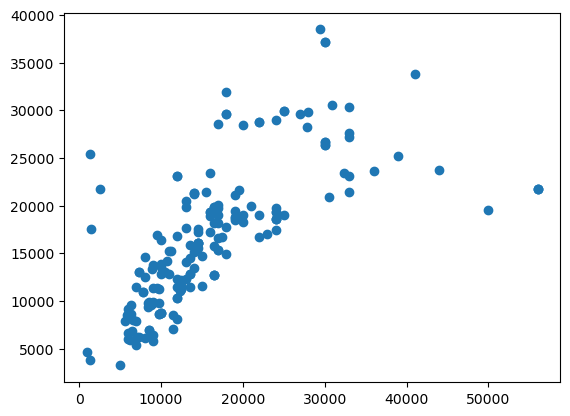

In [67]:
plt.scatter(y_test,y_pred)

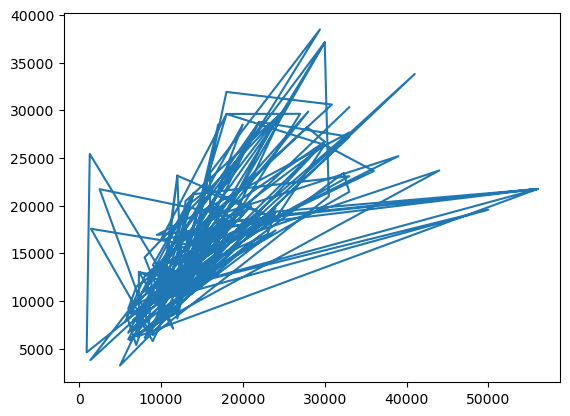

In [68]:
plt.plot(y_test,y_pred)